In [9]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# Question 

With the current setup for thermal stereo vision, can we detect a hotspot in a far away location with a thermal camera? Can we guess how far away it is? As rough numbers, can we detect a location with an uncertainty of 1km at a range of 15km?

The uncertainty comes from the "pixel angle" $\varphi$, we will change the distance $l$ between the camera and the centerline and see how the uncertainty ($d_1 - d_2$) changes when we keep the furthest distance at 15km.

![](./img/plotje.png)

In [10]:
#distance in meters to PoI
distance = 15000
# number of pixels
no_pixels = 640
# Horizontal field of View, convert to radians
hfov = rad(5.5)

Do some simple calculations to get parameters for equation


In [11]:
phi = hfov/no_pixels

In [45]:
def find_depth_uncertainty_for_camera_distance(camera_distance):
    #l = half of distance D between cameras
    l = Symbol('l',real = True)
    l=camera_distance/2
    # angle from higher pixel bound to d1
    alpha = Symbol('alpha',real = True)
    # depth uncertainty
    u = Symbol('u',real = True)
    e1 = Eq( l/tan(alpha-phi),distance)
    #pprint(e1.simplify())
    alpha = solve(e1,alpha)
    #pprint(alpha[0])
    e2 = Eq( l/tan(alpha[0]),distance-u)
    return(solve(e2,u)[0])




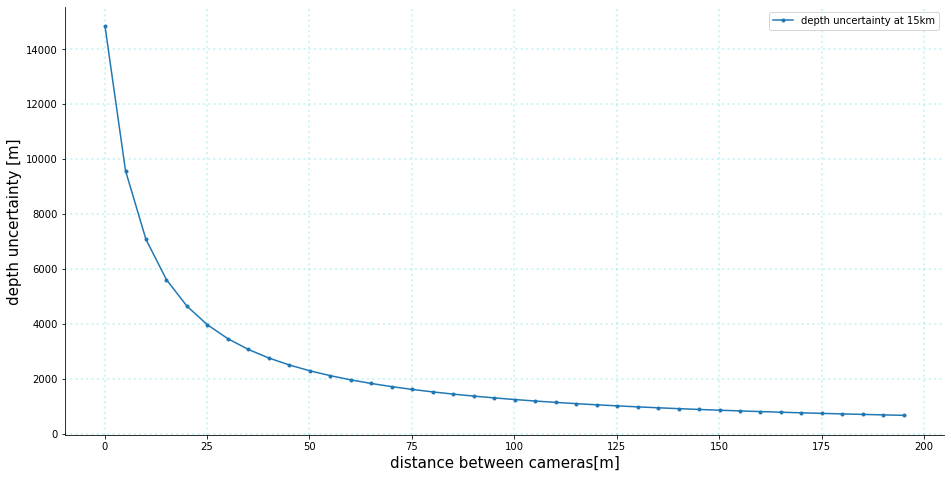

In [47]:

x =  np.arange(0.1, 200, 5);
y= np.empty(0)
for x_ in x:
  y=np.append(y,[find_depth_uncertainty_for_camera_distance(x_/2)])
#max_y = np.max(y)

fig, ax = plt.subplots()

ax.plot(x,y,label='depth uncertainty at 15km', marker=".")
plt.xlabel('distance between cameras[m]', fontsize=15)
plt.ylabel('depth uncertainty [m]', fontsize=15)
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.rcParams['figure.figsize'] = [40/2.54, 20/2.54]
ax.legend()
#ax.set_ylim([0,max_y])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [48]:
np.min(y)

661.402081795600